### Bike Sharing Demand: Regression model on the Capital Bike Share

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Import the relevant sklearn packages
from statsmodels.api import OLS, add_constant
from sklearn.datasets import fetch_california_housing

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    mean_squared_error,
    r2_score, mean_squared_log_error,
     mean_absolute_error, 
)

from sklearn.metrics import r2_score


# Setting up some properties for the plots
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (11, 6)

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# Regularized linear models
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_log_error

#Easy way to get rid of warnings:
import warnings
warnings.simplefilter('ignore')

from sklearn.ensemble import RandomForestRegressor

In [2]:
full_data = pd.read_csv("train.csv")
test_for_kaggle = pd.read_csv("test.csv")

In [3]:
full_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


<AxesSubplot: >

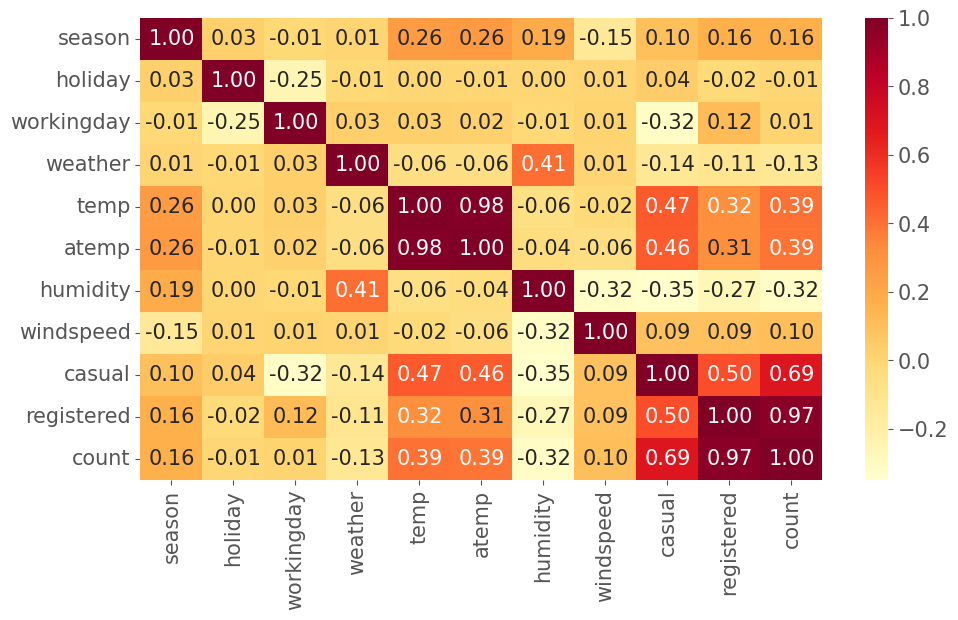

In [4]:
sns.heatmap(full_data.corr(),cmap='YlOrRd', annot=True, fmt=".2f")

In [5]:
test_for_kaggle

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


### Create time related features

In [6]:
full_data['datetime'] =   pd.to_datetime(full_data['datetime'])

In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
full_data.datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [9]:
full_data['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [10]:
full_data['year'] = full_data.datetime.dt.year

In [11]:
full_data['month'] = full_data.datetime.dt.month

In [12]:
full_data['month_name()'] = full_data.datetime.dt.month_name()

In [13]:
full_data['day'] = full_data.datetime.dt.day

In [14]:
full_data['weekday'] = full_data.datetime.dt.weekday

In [15]:
full_data['day_name()'] = full_data.datetime.dt.day_name()

In [16]:
full_data['hour'] = full_data.datetime.dt.hour

In [17]:
full_data['minute'] = full_data.datetime.dt.minute

In [18]:
full_data['quarter'] = full_data.datetime.dt.quarter

In [19]:
full_data['weekofyear'] = full_data.datetime.dt.weekofyear

### Train-Validation split

In [20]:
X = full_data[['holiday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'season']]
y = full_data['count']

In [21]:
Xtrain, Xval, ytrain, yval= train_test_split(X,y, test_size=.25)

In [22]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((8164, 10), (2722, 10), (8164,), (2722,))

In [23]:
df_train = pd.concat([Xtrain,ytrain], axis=1)

In [24]:
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=.20, random_state=4200)

### EDA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


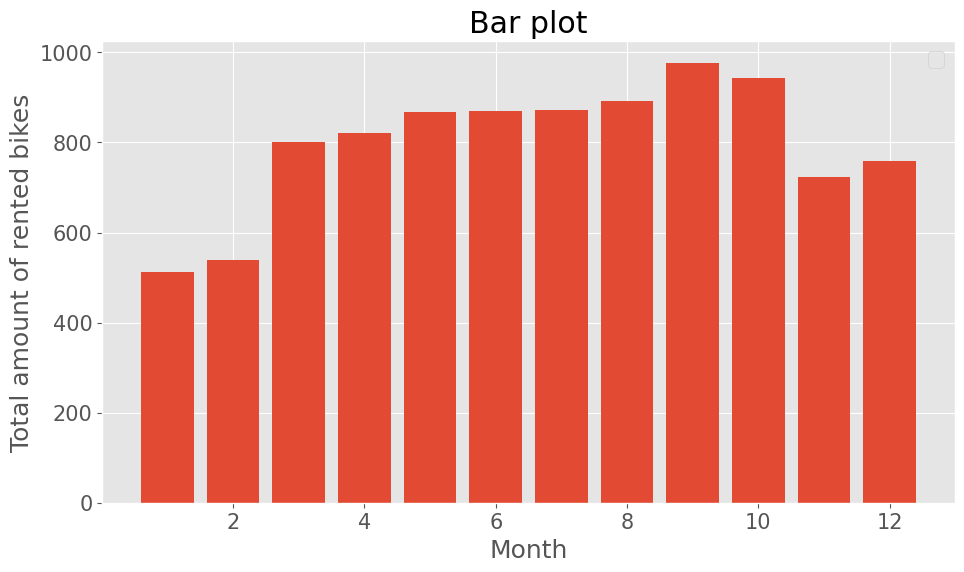

In [31]:
plt.bar(x = df_train['month'], height= df_train['count'])
plt.title('Bar plot')
plt.xlabel('Month') 
plt.ylabel('Total amount of rented bikes')
plt.legend()

<AxesSubplot: xlabel='windspeed', ylabel='Count'>

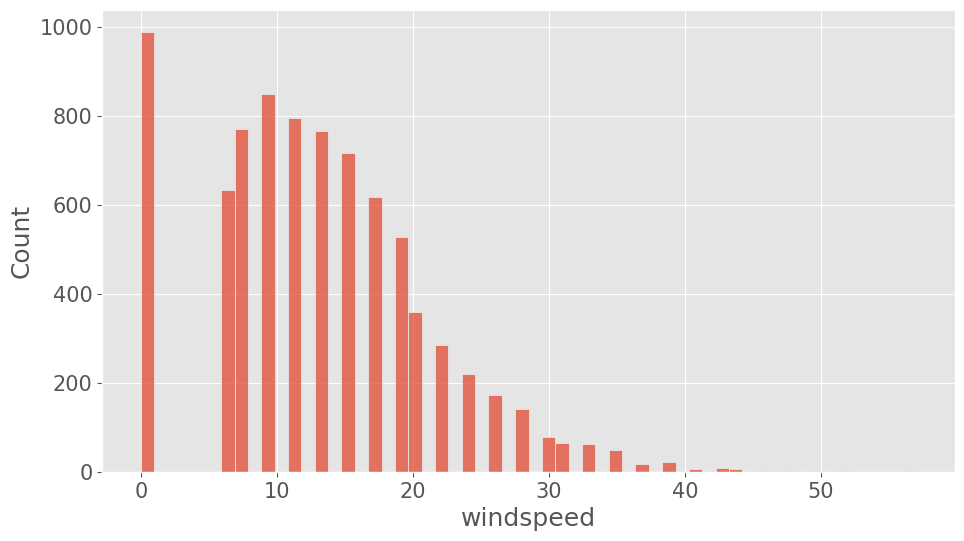

In [26]:
sns.histplot(data=df_train, x= "windspeed")

<AxesSubplot: xlabel='humidity', ylabel='Count'>

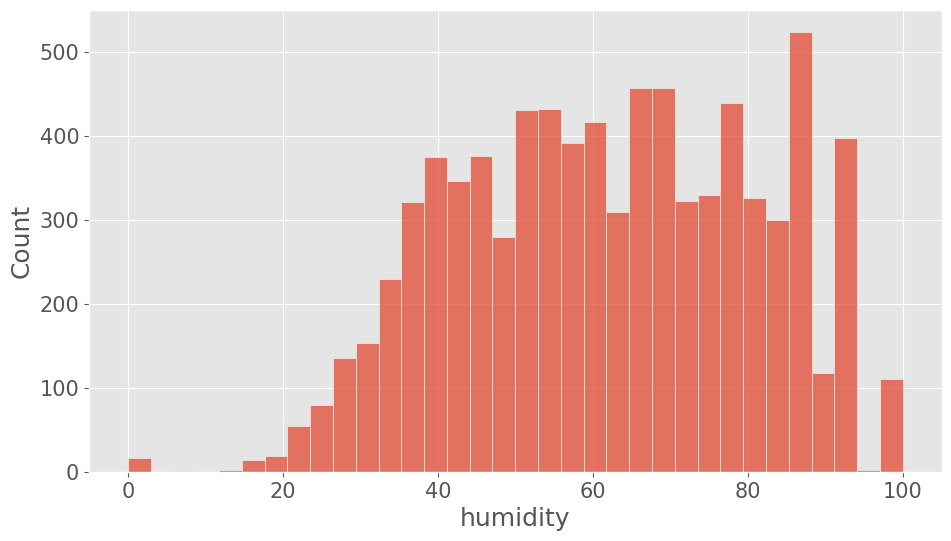

In [27]:
sns.histplot(data=df_train, x= "humidity")

<AxesSubplot: xlabel='temp', ylabel='Count'>

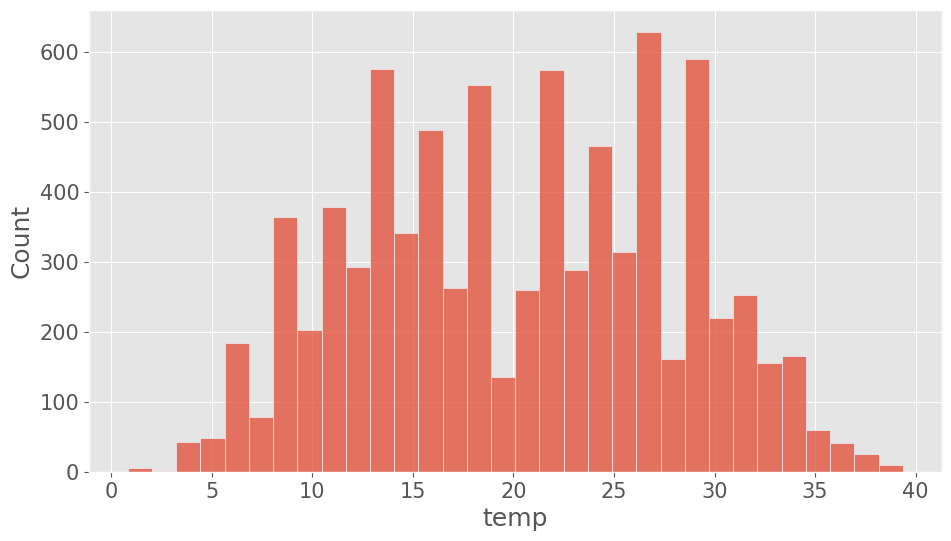

In [28]:
sns.histplot(data=df_train, x= "temp")

<AxesSubplot: xlabel='count', ylabel='Density'>

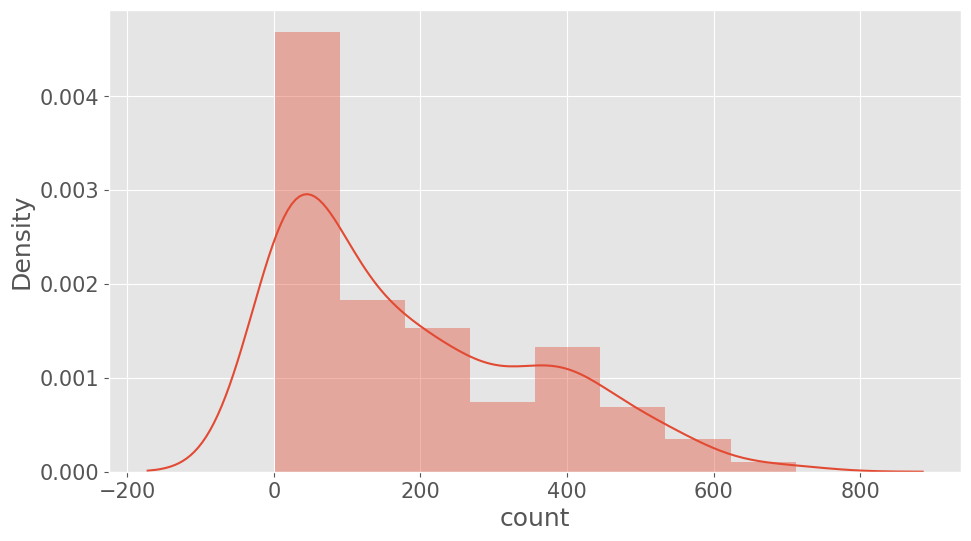

In [29]:
sns.distplot(a=df_train['count'] [df_train['holiday'] == 1])

<AxesSubplot: xlabel='holiday', ylabel='count'>

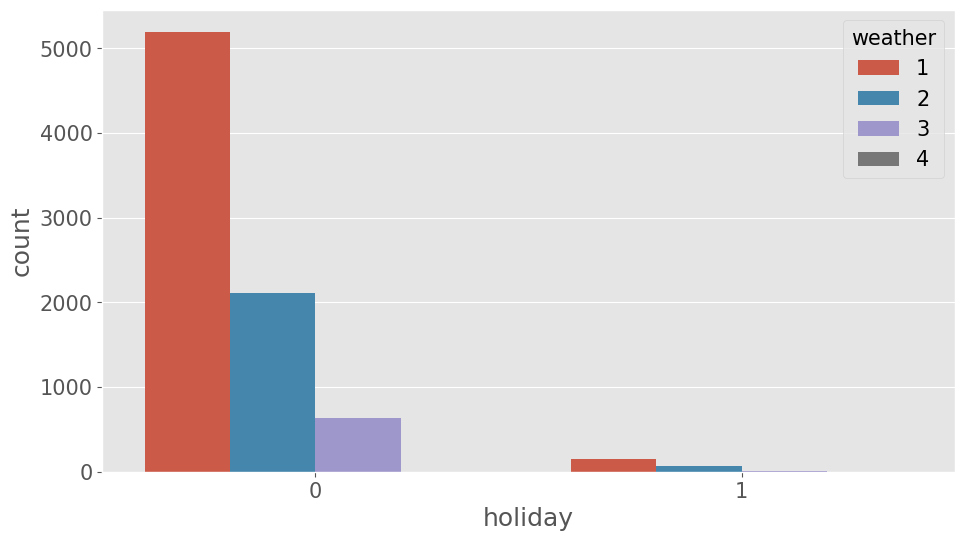

In [32]:
sns.countplot(data=df_train, x= "holiday", hue= "weather")

<AxesSubplot: xlabel='holiday'>

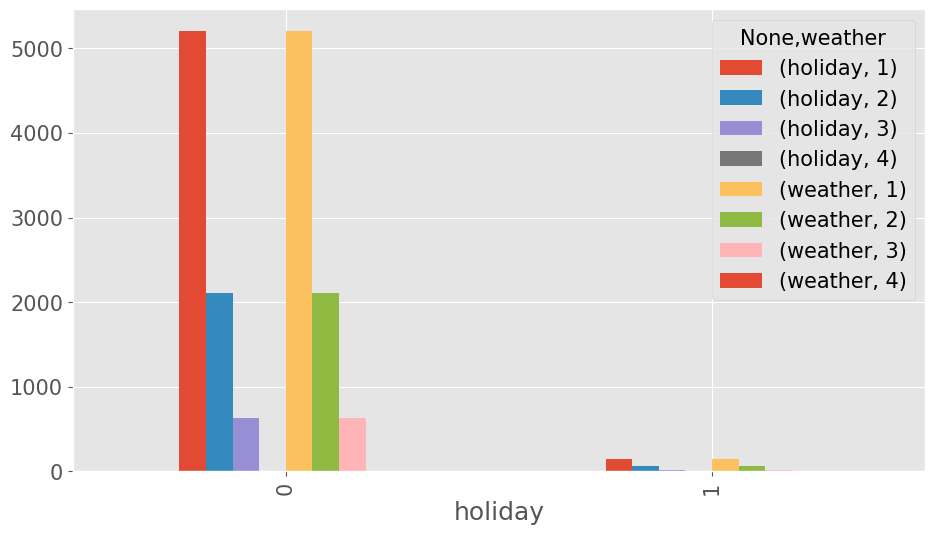

In [33]:
df_train.groupby(by = ["holiday", "weather"])[["holiday", "weather"]].count().unstack().plot.bar()

<AxesSubplot: xlabel='holiday'>

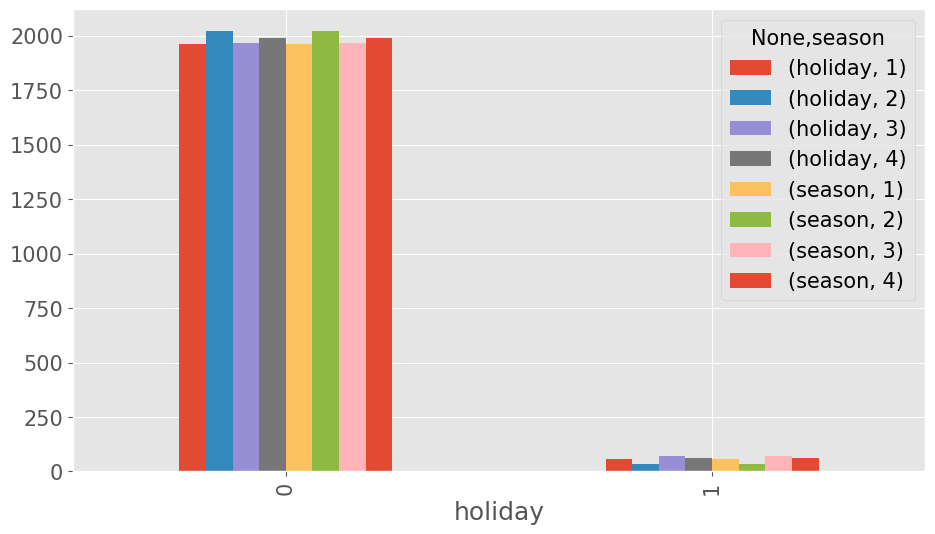

In [34]:
df_train.groupby(by = ["holiday", "season"])[["holiday", "season"]].count().unstack().plot.bar()

In [35]:
df_train.groupby(by = ["month", "day"]).count()

holiday  weather  temp  humidity  windspeed  year  hour  season  \
month day                                                                    
1     1         26       26    26        26         26    26    26      26   
      2         36       36    36        36         36    36    36      36   
      3         34       34    34        34         34    34    34      34   
      4         37       37    37        37         37    37    37      37   
      5         34       34    34        34         34    34    34      34   
...            ...      ...   ...       ...        ...   ...   ...     ...   
12    15        32       32    32        32         32    32    32      32   
      16        32       32    32        32         32    32    32      32   
      17        38       38    38        38         38    38    38      38   
      18        35       35    35        35         35    35    35      35   
      19        37       37    37        37         37    37    37      37   

           count  
month day         
1     1       26  
      2       36  
      3       34  
      4       37  
      5       34  
...          ...  
12    15      32  
      16      32  
      17      38  
      18      35  
      19      37  

[228 rows x 9 columns]

In [36]:
df_train.corr()

,holiday,weather,temp,humidity,windspeed,year,month,day,hour,season,count
holiday,1.000000,-0.008910,0.001561,0.001584,0.007564,0.010317,-0.007045,-0.018001,-0.008151,0.020466,-0.006718
weather,-0.008910,1.000000,-0.058298,0.408805,0.009885,-0.022251,0.007698,-0.012603,-0.025148,0.004918,-0.130263
temp,0.001561,-0.058298,1.000000,-0.059094,-0.016876,0.066583,0.256358,0.013042,0.139088,0.257564,0.391154
humidity,0.001584,0.408805,-0.059094,1.000000,-0.319469,-0.089569,0.209412,-0.011585,-0.273775,0.194243,-0.323633
windspeed,0.007564,0.009885,-0.016876,-0.319469,1.000000,-0.010583,-0.155898,0.035777,0.147094,-0.151222,0.110581
year,0.010317,-0.022251,0.066583,-0.089569,-0.010583,1.000000,-0.010465,-0.003126,0.004057,-0.012002,0.268534
month,-0.007045,0.007698,0.256358,0.209412,-0.155898,-0.010465,1.000000,-0.004036,-0.017540,0.971286,0.162975
day,-0.018001,-0.012603,0.013042,-0.011585,0.035777,-0.003126,-0.004036,1.000000,0.003184,-0.000575,0.025995
hour,-0.008151,-0.025148,0.139088,-0.273775,0.147094,0.004057,-0.017540,0.003184,1.000000,-0.018863,0.398058
season,0.020466,0.004918,0.257564,0.194243,-0.151222,-0.012002,0.971286,-0.000575,-0.018863,1.000000,0.159420


<AxesSubplot: >

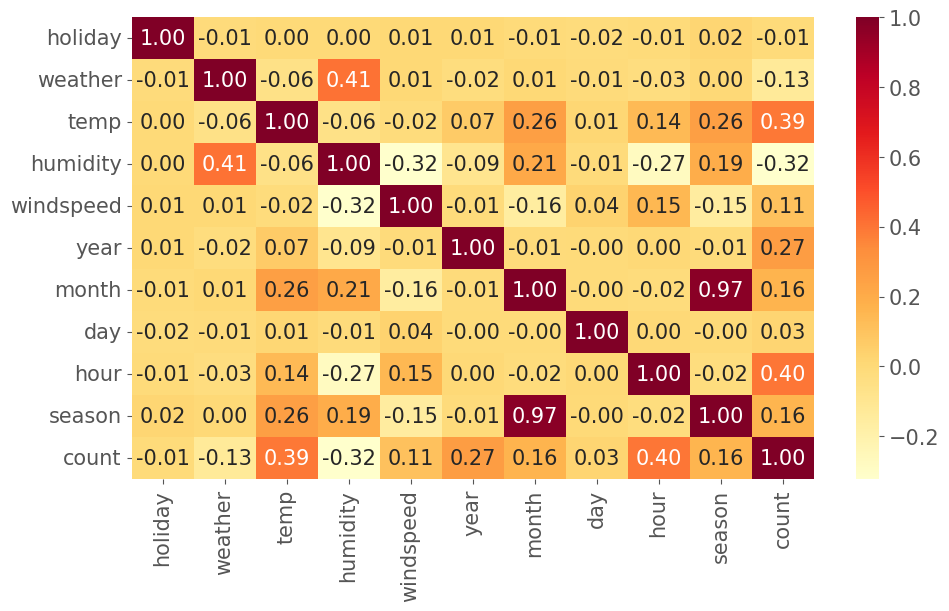

In [38]:
sns.heatmap(df_train.corr(),cmap='YlOrRd', annot= True, fmt=".2f")

In [39]:
# sns.pairplot(full_data.corr())

### Column Transformation

What has to be changed?

- holiday = STAY like this, but consider!
- workingday = STAY like this, but consider!


- weather = categorical (ohe)
- atemp = binning
- humidity = binning  
- windspeed = scaling (MinMaxScaler)
- year = categorical (ohe)
- month = categorical (ohe)
- day = categorical (ohe)
- hour = scaling (MinMaxScaler)
- quarter = categorical (ohe)

In [43]:
fe = ColumnTransformer([
    ("ohe_weather_month_day_quarter", OneHotEncoder(sparse=False), ["weather", "month", "day", "season"]),
    ("scaling_windspeed_hour", MinMaxScaler(), ["windspeed", "hour"]),
    ("binning_atemp_humidity",KBinsDiscretizer(encode="onehot-dense"), ["temp", "humidity"]),
    ("do nothin", "passthrough", ["holiday"])
]).set_output(transform="pandas")
fe

ColumnTransformer(transformers=[('ohe_weather_month_day_quarter',
                                 OneHotEncoder(sparse=False),
                                 ['weather', 'month', 'day', 'season']),
                                ('scaling_windspeed_hour', MinMaxScaler(),
                                 ['windspeed', 'hour']),
                                ('binning_atemp_humidity',
                                 KBinsDiscretizer(encode='onehot-dense'),
                                 ['temp', 'humidity']),
                                ('do nothin', 'passthrough', ['holiday'])])

In [44]:
df_train.columns

Index(['holiday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'month',
       'day', 'hour', 'season', 'count'],
      dtype='object')

In [45]:
df_train.describe()

,holiday,weather,temp,humidity,windspeed,year,month,day,hour,season,count
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,0.027927,1.423689,20.273907,61.846276,12.849139,2011.504655,6.511391,9.992651,11.538707,2.505512,192.448310
std,0.164775,0.634221,7.757468,19.261440,8.203503,0.500009,3.439791,5.465130,6.915768,1.116773,182.280826
min,0.000000,1.000000,0.820000,0.000000,0.000000,2011.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,13.940000,47.000000,7.001500,2011.000000,4.000000,5.000000,6.000000,2.000000,42.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,2012.000000,7.000000,10.000000,12.000000,3.000000,145.500000
75%,0.000000,2.000000,26.240000,77.000000,16.997900,2012.000000,10.000000,15.000000,18.000000,4.000000,286.000000
max,1.000000,4.000000,39.360000,100.000000,56.996900,2012.000000,12.000000,19.000000,23.000000,4.000000,977.000000


In [46]:
Xtrain_tran= fe.fit_transform(Xtrain)

In [47]:
Xval_tran= fe.transform(Xval)

### Linear Regression 

#### Using all selected and transformed features

In [48]:
mlin = LinearRegression()

In [49]:
ytrain_log = np.log1p(ytrain)

In [50]:
mlin.fit(Xtrain_tran,ytrain_log)

LinearRegression()

In [51]:
ypred_mlin= mlin.predict(Xtrain_tran)

In [52]:
ytrain_pred_log = mlin.predict(Xtrain_tran)

In [53]:
ytrain_pred_unlog = np.exp(ytrain_pred_log)-1

In [54]:
yval_pred_log= mlin.predict(Xval_tran)

In [55]:
yval_pred_unlog= np.exp(yval_pred_log)-1

In [56]:
mean_squared_log_error(ytrain, ytrain_pred_unlog,squared=False), mean_squared_log_error(yval, yval_pred_unlog,squared=False)

(1.027480634529414, 1.0429778717901872)

In [57]:
m_r2 = mlin.score(Xtrain_tran, ytrain_log)
m_rmse = np.sqrt(mean_squared_error(ytrain_log, ypred_mlin))
m_rmsle = mean_squared_log_error(ytrain,ytrain_pred_unlog)

In [58]:
m_r2

0.4770190062157378

In [59]:
m_rmse

1.027480634529414

In [60]:
m_rmsle

1.0557164543329676

##### Alternatives

In [61]:
# r2_score(ytrain, ytrain_pred_unlog)

In [62]:
# RSME = mean_squared_error(ytrain, ytrain_pred_unlog, squared=False)
# RSME

In [63]:
# RMSLE= mean_squared_log_error(ytrain, ytrain_pred_unlog, squared=False)
# RMSLE

In [64]:
# mean_squared_log_error(ytrain, ytrain_pred_unlog)

In [65]:
# ytrain_log.to_list()

##### Check, if no negative values predicted & absolute percentage error (bonus)

In [66]:
np.sum(np.expm1(ytrain_pred_log) < 0)

0

In [67]:
from sklearn.metrics import mean_absolute_percentage_error
MAP = mean_absolute_percentage_error(ytrain, ytrain_pred_log)
MAP

0.9019617170433415

### Linear Regression using polynomial features and interaction

In [68]:
mlin_poly= LinearRegression()

In [69]:
polynomial_transformer = PolynomialFeatures(
    include_bias=False,
    interaction_only=False,
    degree=2)

In [70]:
# Xtrain_tran.columns

In [71]:
Xtrain_tran_poly = polynomial_transformer.fit_transform(Xtrain_tran)
Xval_tran_poly = polynomial_transformer.transform(Xval_tran)
Xtrain_tran_poly_poly = pd.DataFrame(Xtrain_tran_poly, columns = polynomial_transformer.get_feature_names_out())

In [72]:
mlin_poly.fit(Xtrain_tran_poly, ytrain_log)

LinearRegression()

In [73]:
ytrain_pred_mlin_poly_log = mlin_poly.predict(Xtrain_tran_poly)

In [74]:
ytrain_pred_mlin_poly_unlog = np.exp(ytrain_pred_mlin_poly_log)-1

In [75]:
yval_pred_mlin_poly_log = mlin_poly.predict(Xval_tran_poly)

In [76]:
yval_pred_mlin_poly_unlog= np.exp(yval_pred_mlin_poly_log)-1

In [77]:
np.sum(np.exp(ytrain_pred_mlin_poly_log)-1 < 0)

0

In [78]:
np.sum(np.exp(yval_pred_mlin_poly_log)-1 < 0)

0

In [79]:
RMSLE_ytrain= mean_squared_log_error(ytrain, ytrain_pred_mlin_poly_unlog,squared=False)
RMSLE_ytrain

0.8701880220609054

In [80]:
RMSLE_yval= mean_squared_log_error(yval, yval_pred_mlin_poly_unlog,squared=False)
RMSLE_yval

0.9128557593237293

### Regularization

##### with added polynomial features

In [81]:
m_poly_reg = LinearRegression()

In [82]:
m_poly_reg.fit(Xtrain_tran_poly, ytrain_log)

LinearRegression()

In [83]:
ypred_poly_reg = m_poly_reg.predict(Xtrain_tran_poly)

In [84]:
ytrain_reg_unlog = np.exp(ypred_poly_reg)-1
ytrain_reg_unlog

array([ 33.03760083,  33.57361505, 124.1137887 , ...,  50.14641402,
       293.32729099, 553.18850068])

In [85]:
m_poly_reg_r2 = m_poly_reg.score(Xtrain_tran_poly, ytrain_log)
m_poly_reg_rmse = np.sqrt(mean_squared_error(ytrain_log, ytrain_pred_mlin_poly_unlog))
m_poly_reg_rmsle = mean_squared_log_error(ytrain,ytrain_reg_unlog)

In [86]:
m_poly_reg_r2

0.6248846660707558

In [87]:
m_poly_reg_rmse

211.3368076545164

In [88]:
m_poly_reg_rmsle

0.7572271937382707

#### RIDGE

In [89]:
m_ridge = Ridge(alpha=1, random_state=31)

In [90]:
m_ridge.fit(Xtrain_tran_poly, ytrain_log)

Ridge(alpha=1, random_state=31)

In [91]:
ypred_ridge = m_ridge.predict(Xtrain_tran_poly)

In [92]:
ytrain_ridge_unlog = np.exp(ypred_ridge)-1
ytrain_ridge_unlog

array([ 25.88813819,  22.85928393, 120.47964702, ...,  44.57497104,
       300.36902269, 500.71623243])

In [93]:
r2_score(ytrain, ytrain_ridge_unlog)

0.48872992363036205

In [94]:
m_ridge_r2 = m_ridge.score(Xtrain_tran_poly, ytrain_log)
m_ridge_rmse = np.sqrt(mean_squared_error(ytrain_log, ypred_ridge))
m_ridge_rmsle = mean_squared_log_error(ytrain,ytrain_ridge_unlog)

In [95]:
m_ridge_r2

0.6343267181874732

In [96]:
m_ridge_rmse

0.8591664445865019

In [97]:
m_ridge_rmsle

0.7381669795034107

#### LASSO

In [98]:
m_lasso = Lasso(alpha=1, random_state=31)

In [99]:
m_lasso.fit(Xtrain_tran_poly, ytrain_log)

Lasso(alpha=1, random_state=31)

In [100]:
ypred_lasso = m_lasso.predict(Xtrain_tran_poly)

In [101]:
ytrain_lasso_unlog = np.exp(ypred_lasso)-1
ytrain_lasso_unlog

array([97.17947547, 97.17947547, 97.17947547, ..., 97.17947547,
       97.17947547, 97.17947547])

In [102]:
m_lasso_r2 = m_lasso.score(Xtrain_tran_poly,ytrain_log)
m_lasso_rmse = np.sqrt(mean_squared_error(ytrain_log,ypred_lasso))
m_lasso_rmsle = mean_squared_log_error(ytrain,ytrain_lasso_unlog)

In [103]:
m_lasso_r2

0.0

In [104]:
m_lasso_rmse

1.420792618890238

In [105]:
m_lasso_rmsle

2.018651665892981

#### Elastic

In [106]:
m_elastic_net = ElasticNet(alpha=1, l1_ratio=0,
                           random_state=31) # only RIDGE, no LASSO with ratio=0

In [107]:
m_elastic_net.fit(Xtrain_tran_poly, ytrain_log)

ElasticNet(alpha=1, l1_ratio=0, random_state=31)

In [108]:
ElasticNet(alpha=1, random_state=31, l1_ratio=0.25)

ElasticNet(alpha=1, l1_ratio=0.25, random_state=31)

In [109]:
ypred_elastic = m_elastic_net.predict(Xtrain_tran_poly)

In [110]:
ytrain_elastic_unlog = np.exp(ypred_elastic)-1
ytrain_elastic_unlog

array([ 53.31625508,  42.11947665, 104.05716559, ...,  57.01983106,
       185.58559018, 194.37234122])

In [111]:
m_elastic_r2 = m_elastic_net.score(Xtrain_tran_poly,ytrain_log)
m_elastic_rmse = np.sqrt(mean_squared_error(ytrain_log,ypred_elastic))
m_elastic_rmsle = mean_squared_log_error(ytrain,ytrain_elastic_unlog)

In [112]:
m_elastic_r2

0.28231756339141856

In [113]:
m_elastic_rmse

1.2036406632554613

In [114]:
m_elastic_rmsle

1.4487508462420469

### RandomForestRegressor

In [115]:
rf = RandomForestRegressor(max_depth=5, random_state=0)

#### apply RF on the variables above (old score)

In [116]:
rf.fit(Xtrain_tran, ytrain)

RandomForestRegressor(max_depth=5, random_state=0)

In [117]:
rf_r2_old = rf.score(Xtrain_tran, ytrain)
rf_r2_old

0.5959530012262555

In [118]:
ytrain_pred_rf_old_log = rf.predict(Xtrain_tran)

In [119]:
ytrain_pred_rf_old_unlog = np.exp(ytrain_pred_rf_old_log)-1

In [120]:
rf_old_rmsle= mean_squared_log_error(ytrain,ytrain_pred_rf_old_unlog)
rf_old_rmsle

53169.67349375755

#### apply RF on the transformed variables (new score)

In [121]:
rf.fit(Xtrain_tran_poly, ytrain_log)

RandomForestRegressor(max_depth=5, random_state=0)

In [122]:
rf_r2_new = rf.score(Xtrain_tran_poly, ytrain_log)
rf_r2_new

0.779512424466286

In [123]:
ytrain_pred_rf_new_log = rf.predict(Xtrain_tran_poly)

In [124]:
ytrain_pred_rf_new_unlog = np.exp(ytrain_pred_rf_new_log)-1

In [125]:
rf_new_rmsle= mean_squared_log_error(ytrain,ytrain_pred_rf_new_unlog)
rf_new_rmsle

0.44508761165983635

### OLS

In [126]:
# Create a list of features
forward_features = []

# Original features
feature_list = Xtrain_tran.columns

In [127]:
feature_list

Index(['ohe_weather_month_day_quarter__weather_1',
       'ohe_weather_month_day_quarter__weather_2',
       'ohe_weather_month_day_quarter__weather_3',
       'ohe_weather_month_day_quarter__weather_4',
       'ohe_weather_month_day_quarter__month_1',
       'ohe_weather_month_day_quarter__month_2',
       'ohe_weather_month_day_quarter__month_3',
       'ohe_weather_month_day_quarter__month_4',
       'ohe_weather_month_day_quarter__month_5',
       'ohe_weather_month_day_quarter__month_6',
       'ohe_weather_month_day_quarter__month_7',
       'ohe_weather_month_day_quarter__month_8',
       'ohe_weather_month_day_quarter__month_9',
       'ohe_weather_month_day_quarter__month_10',
       'ohe_weather_month_day_quarter__month_11',
       'ohe_weather_month_day_quarter__month_12',
       'ohe_weather_month_day_quarter__day_1',
       'ohe_weather_month_day_quarter__day_2',
       'ohe_weather_month_day_quarter__day_3',
       'ohe_weather_month_day_quarter__day_4',
       'ohe_weath

In [128]:
possible_models = pd.DataFrame(columns=['features', 'p', 'r2'])
# Run a linear regression separately on each of the features

In [129]:
while len(feature_list) > 0:
    forward_selection = pd.DataFrame(columns=['features', 'p', 'r2'])
    for feature in feature_list:
        m_feature = OLS(ytrain, Xtrain_tran[forward_features + [feature]])
#         print(forward_features + [feature])
        result = m_feature.fit()
#         print(result.summary())
        forward_selection = forward_selection.append({
                                    'feature': feature
                                  , 'features': forward_features + [feature]
                                  , 'p': result.pvalues.loc[feature]
                                  , 'r2': result.rsquared}
                                  , ignore_index=True)

    # p > 0.05 -> not significant
    # p <= 0.05 significant
    # p <= 0.01 very significant
    # p <= 0.001 highly significant

    if forward_selection.sort_values('p').iloc[0].p < 0.05:
        print(forward_selection.sort_values('p').iloc[0].features)
        best_feature = forward_selection.sort_values('p').iloc[0].feature
        forward_features.append(best_feature)
        feature_list = feature_list.drop(best_feature)
        best_model = forward_selection[forward_selection['feature']==best_feature]
        possible_models = possible_models.append(best_model, ignore_index=True)

    else:
        break

['ohe_weather_month_day_quarter__weather_1']
['ohe_weather_month_day_quarter__weather_1', 'ohe_weather_month_day_quarter__weather_2']
['ohe_weather_month_day_quarter__weather_1', 'ohe_weather_month_day_quarter__weather_2', 'scaling_windspeed_hour__hour']
['ohe_weather_month_day_quarter__weather_1', 'ohe_weather_month_day_quarter__weather_2', 'scaling_windspeed_hour__hour', 'binning_atemp_humidity__temp_4.0']
['ohe_weather_month_day_quarter__weather_1', 'ohe_weather_month_day_quarter__weather_2', 'scaling_windspeed_hour__hour', 'binning_atemp_humidity__temp_4.0', 'binning_atemp_humidity__temp_0.0']
['ohe_weather_month_day_quarter__weather_1', 'ohe_weather_month_day_quarter__weather_2', 'scaling_windspeed_hour__hour', 'binning_atemp_humidity__temp_4.0', 'binning_atemp_humidity__temp_0.0', 'binning_atemp_humidity__humidity_0.0']
['ohe_weather_month_day_quarter__weather_1', 'ohe_weather_month_day_quarter__weather_2', 'scaling_windspeed_hour__hour', 'binning_atemp_humidity__temp_4.0', 'binn

In [130]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.698
Method:                 Least Squares   F-statistic:                              957.7
Date:                Fri, 27 Jan 2023   Prob (F-statistic):                        0.00
Time:                        13:22:56   Log-Likelihood:                         -55704.
No. Observations:                8708   AIC:                                  1.115e+05
Df Residuals:                    8687   BIC:                                  1.116e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
ohe_weather_month_day_quarter__weather_1    24.5065      5.162      4.747      0.000      14.387      34.626
ohe_weather_month_day_quarter__weather_2    34.8381      5.337      6.528      0.000      24.376      45.300
scaling_windspeed_hour__hour               167.8934      5.321     31.550      0.000     157.462     178.325
binning_atemp_humidity__temp_4.0           186.1186      8.042     23.144      0.000     170.355     201.882
binning_atemp_humidity__temp_0.0           -37.2345      5.428     -6.860      0.000     -47.874     -26.595
binning_atemp_humidity__humidity_0.0        96.4503      5.336     18.074      0.000      85.990     106.911
ohe_weather_month_day_quarter__season_1    -18.0125      6.193     -2.908      0.004     -30.153      -5.872
binning_atemp_humidity__humidity_1.0        51.7327      5.038     10.269      0.000      41.858      61.608
binning_atemp_humidity__temp_3.0           103.4264      6.247     16.556      0.000      91.181     115.672
ohe_weather_month_day_quarter__season_4     54.6162      5.588      9.774      0.000      43.662      65.570
binning_atemp_humidity__humidity_4.0       -35.4460      4.623     -7.667      0.000     -44.509     -26.383
ohe_weather_month_day_quarter__month_5      25.2397      7.558      3.339      0.001      10.424      40.056
ohe_weather_month_day_quarter__month_9      76.0696      7.176     10.600      0.000      62.002      90.137
ohe_weather_month_day_quarter__season_3    -75.0209      8.304     -9.034      0.000     -91.299     -58.743
binning_atemp_humidity__temp_2.0            34.4667      4.981      6.919      0.000      24.702      44.231
binning_atemp_humidity__humidity_2.0        25.2259      4.934      5.112      0.000      15.554      34.898
ohe_weather_month_day_quarter__month_6     -30.7639      8.241     -3.733      0.000     -46.919     -14.609
ohe_weather_month_day_quarter__month_1     -20.0568      6.944     -2.888      0.004     -33.669      -6.444
ohe_weather_month_day_quarter__day_6        18.9913      7.073      2.685      0.007       5.126      32.857
ohe_weather_month_day_quarter__day_17       15.0646      6.920      2.177      0.030       1.499      28.630
do nothin__holiday                         -13.4755      9.508     -1.417      0.156     -32.113       5.162
==============================================================================
Omnibus:                     2020.223   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4451.566
Skew:                           1.332   Prob(JB):                         0.00
Kurtosis:                       5.274   Cond. No.   

#### Info

In [ ]:
# r2_score(ytrain, predictions_mlin_poly)

In [ ]:
# r2_score(ytrain_log, y_pred)

In [ ]:
# mlin.predict(Xtrain) > 0

In [ ]:
# mlin.predict((Xval)) > 0

In [ ]:
# ytrain_pred_log_poly = mlin.predict(Xtrain_tran_poly)

In [ ]:
# ytrain_pred_poly = np.exp(ytrain_pred_log_poly)-1

In [ ]:
# ytrain_log= np.log1p(ytrain)